In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Users\dh1181tu\OneDrive\Desktop\Capstone project\new_testing_data.xlsx')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,245224068,106074990,Caucasian,Female,[80-90),?,1,3,7,3,...,No,No,No,No,No,No,No,No,Yes,>30
1,280344456,40608414,Caucasian,Female,[80-90),?,1,1,7,3,...,No,No,No,No,No,No,No,Ch,Yes,NO
2,353135096,108230283,Caucasian,Female,[90-100),?,2,3,6,3,...,No,No,No,No,No,No,No,No,No,NO
3,127615968,94194585,Caucasian,Female,[70-80),?,3,1,1,10,...,No,Down,No,No,No,No,No,Ch,Yes,>30
4,74057760,195372,AfricanAmerican,Male,[70-80),?,1,6,7,2,...,No,No,No,No,No,No,No,No,No,NO


In [3]:
#checking shape of the dataset
df.shape

(20354, 50)

In [4]:
#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [5]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 471
gender 0
age 0
weight 19725
payer_code 8086
medical_specialty 10061
diag_1 1
diag_2 59
diag_3 284
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [6]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count()) 

gender 1


In [7]:
#Dealing with Missing Values
#Variable weight contains approximate 98% of the missing values so there is no significance in filling those missing values
#so we decided to drop these variables. 
#Variable Payer code and medical specialty contains approximate 40% missing values
#so we also dropped these variables. Variables race, diag_1, diag_2, diag_3 and gender 
#contains very less missing values as compared to other attributes which we dropped
#so for these attributes we also decided to drop those where missing values contains.

In [8]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [9]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]


In [10]:
#variables (drugs named citoglipton and examide), all records have the same value. 
#So essentially these cannot provide any interpretive or discriminatory information 
#for predicting readmission so we decided to drop these two variables

In [11]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [12]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())  

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


In [13]:
###Feature engineering

In [14]:
#This is highly subjective, and partly depends on a knowledge of health care services, and making sense of the potential relationships between features.
#There are perhaps thousands of ways to try here. We tried some..

In [15]:
#Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. 
#These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below).
#The idea was to see which version gives us better results.
#Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage.

In [16]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [17]:
#Number of medication changes: 
#The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. 
#Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. 
#We decided to count how many changes were made in total for each patient, and declared that a new feature. 
#The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [18]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()  

0    14058
1     4973
2      238
3       15
4        1
Name: numchange, dtype: int64

In [19]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [20]:
###Encoding some variables: 
#The original dataset used string values for gender, race, medication change, and each of the 23 drugs used.
#To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. 
#For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [21]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [22]:
##We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

In [23]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [24]:
#Dealing with age: There are different ways to deal with this.
#The dataset only gives us age as 10 year categories,
#so we don’t know the exact age of each patient. 
#The previous study on this dataset used age categories as nominal variables,
#but we wanted to be able to see the effect of increasing age on readmission, 
#even if in a crude way. To do that, we assume that age of the patient on average lies
#at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, 
#then we assume the age = 25 years. So we converted age categories to midpoints, 
#resulting in a numeric variable:

In [25]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     4987
7     4365
6     3244
9     3192
5     1854
4      718
10     521
3      296
2       95
1       13
Name: age, dtype: int64

In [26]:
#Collapsing of Multiple Encounters for same patient Some patients in the dataset had more
#than one encounter.We could not count them as independent encounters because
#that bias the results towards those patients who had multiple encounters. 
#Thus we tried multiple techniques to collapse and consolidate multiple encounters for same patient such as:

In [27]:
#Considering more than 2 readmissions across multiple encounters as readmission for collapsed record.
#Considering average stay at hospital across multiple encounters.
#Considering the percentage of the medication changes across multiple encounters
#Considering the total number of the encounters to replace the encounter unique ID
#Considering the combination of diagnoses across multiple encounters as a list However, taking the features such as “diagnosis”, 
#for instance, we did not find it not meaningful to combine multiple categorical values into
#an array for building data model.
#We then considered first encounter and last encounter separately as possible representations 
#of multiple encounters. However, last encounters gave extremely imbalanced data for readmissions
#(96/4 Readmissions vs No Readmissions) and thus, we decided to use first encounters of patients with multiple encounters. 

In [28]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [29]:
df.head().T

,0,1,2,3,4
encounter_id,245224068,280344456,353135096,127615968,74057760
patient_nbr,106074990,40608414,108230283,94194585,195372
race,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,0,0,0,0,1
age,9,9,10,8,8
admission_type_id,1,1,1,3,1
discharge_disposition_id,2,1,2,1,1
admission_source_id,7,7,4,1,7
time_in_hospital,3,3,3,10,2
num_lab_procedures,42,22,10,2,40


In [30]:
#Encoding the outcome variable: 
#The outcome we are looking at is whether the patient gets 
#readmitted to the hospital within 30 days or not.
#The variable actually has < 30, > 30 and No Readmission categories. 
#To reduce our problem to a binary classification, 
#we combined the readmission after 30 days and no readmission into a single category:

In [31]:
df['readmitted'].value_counts()

NO     10183
>30     6922
<30     2180
Name: readmitted, dtype: int64

In [32]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [33]:
# Categorization of diagnoses:
# The dataset contained up to three diagnoses for a given patient (primary, secondary and additional). However, each of 
# these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully.
# Therefore, we collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the 
# original publication using this dataset. These 9 categories include Circulatory, Respiratory, Digestive, Diabetes, 
# Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others. Although we did this for primary, secondary and additional
# diagnoses, we eventually decided to use only the primary diagnosis in our model. Doing this in python was slightly 
# cumbersome because, well, we are mapping the disease codes to certain category names. Below code should demonstrate this 
# easily.

In [34]:
# Creating additional columns for diagnosis# Creati 
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [35]:
df.loc[df['diag_1'].str.contains('V',na=False), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E',na=False), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V',na=False), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E',na=False), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V',na=False), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E',na=False), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [36]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [37]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0

In [38]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

# Data Visualization

In [39]:
#Our target variable is imbalance. 
#Number of readmitted patient are quite less as compared to Not readmitted

Text(0.5, 1.0, 'Distrinution of Readmission')

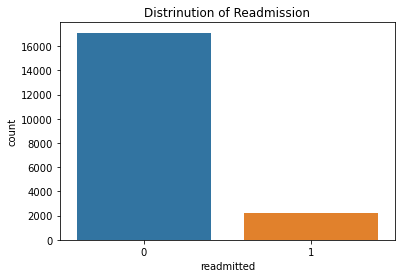

In [40]:
import seaborn as sns
# Distribution of Readmission 
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

In [41]:
###Time in Hospital and Readmission

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

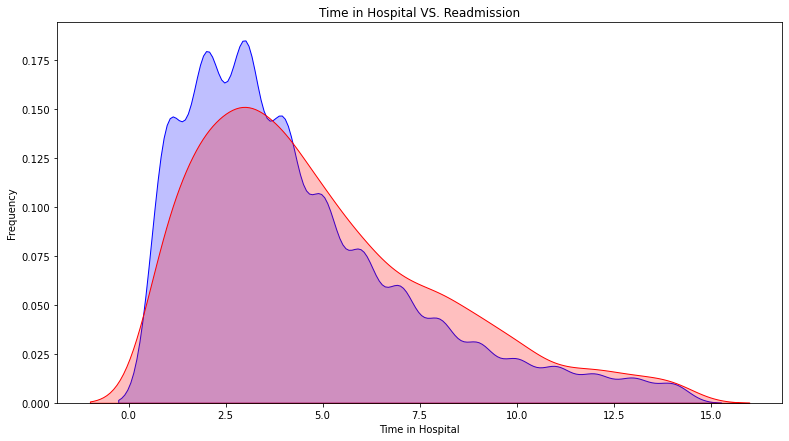

In [42]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [43]:
###Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

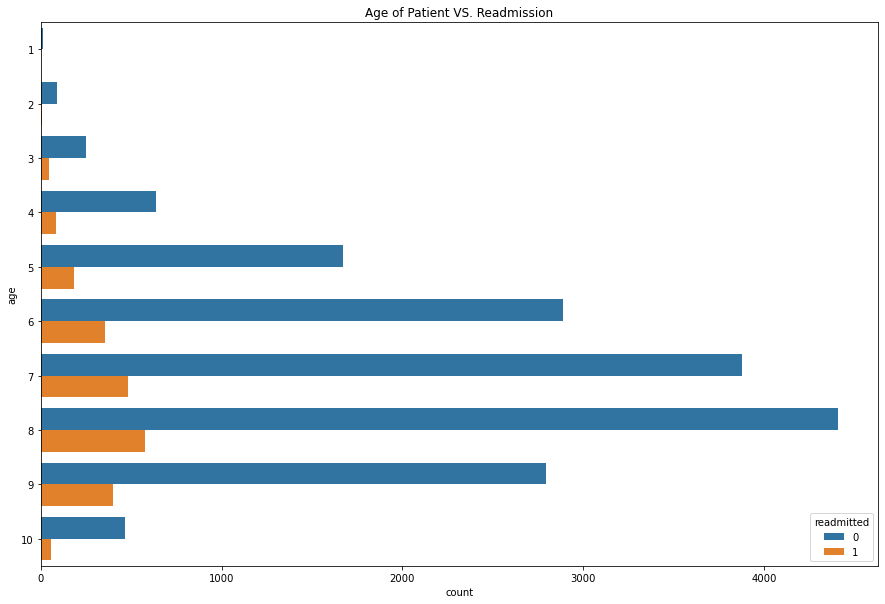

In [44]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

In [45]:
#Ethnicity of patient and Readmission

<AxesSubplot:xlabel='count', ylabel='race'>

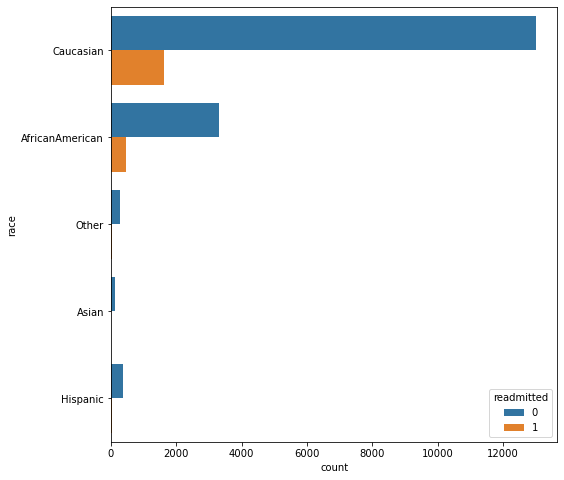

In [46]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

In [47]:
##Number of medication used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

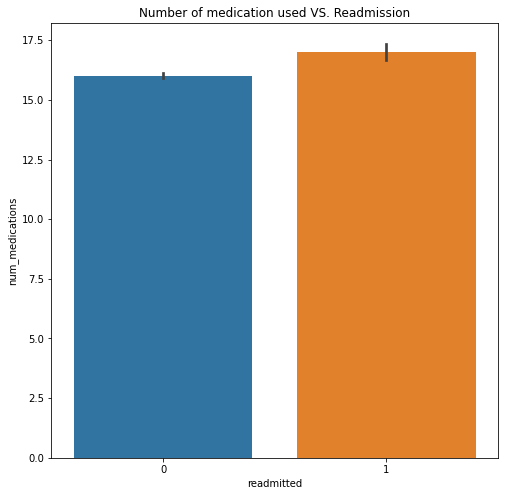

In [48]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

In [49]:
#Gender and Readmission
#Male = 1
#Female = 0

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

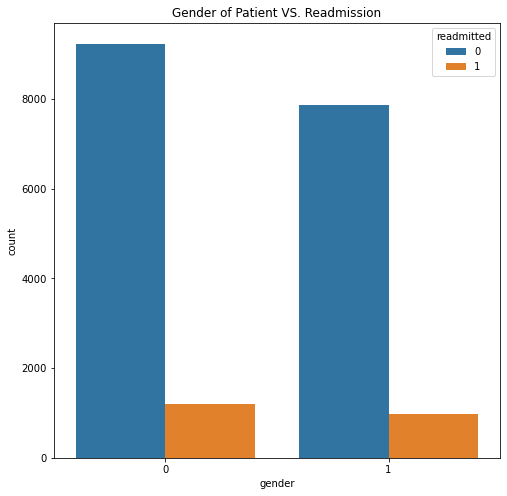

In [50]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

In [51]:
#Change of Medication and Readmission
#Change = 1
#No Change = 0

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

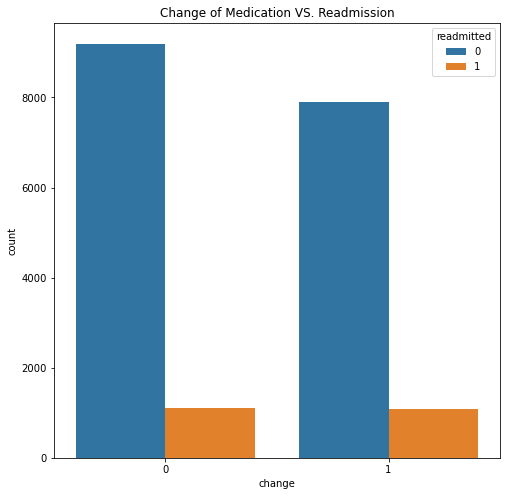

In [52]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

In [53]:
#Diabetes Medication prescribed and Readmission
#Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
#Values: “yes” : 1 “no” : 0

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

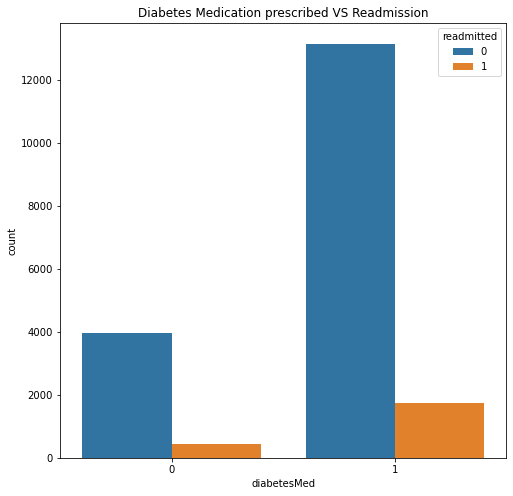

In [54]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

In [55]:
#Service Utilization and Readmission

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

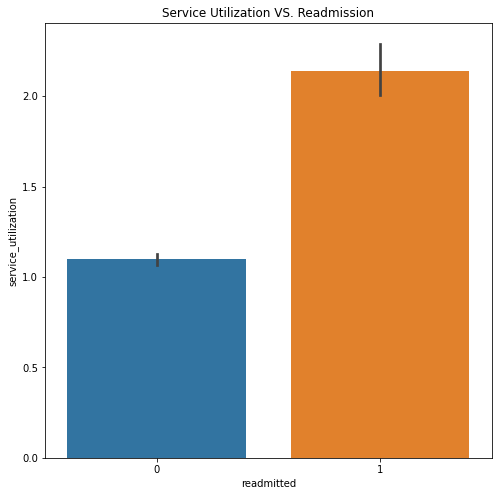

In [56]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

In [57]:
#Glucose serum test result and Readmission

In [58]:
##Glucose Serum test - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

#'>200' : 1 = indicates diabetes
#'>300' : 1 = Indicates diabetes
#'Norm' : 0 = Normal
#'None' : -99 = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

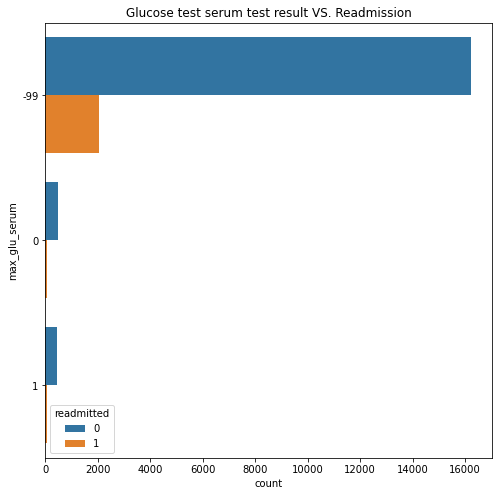

In [59]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

In [60]:
##A1C result and Readmission A1C test - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.

#'>7' : 1
#'>8' : 1
#Norm : 0 = Normal
#None : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

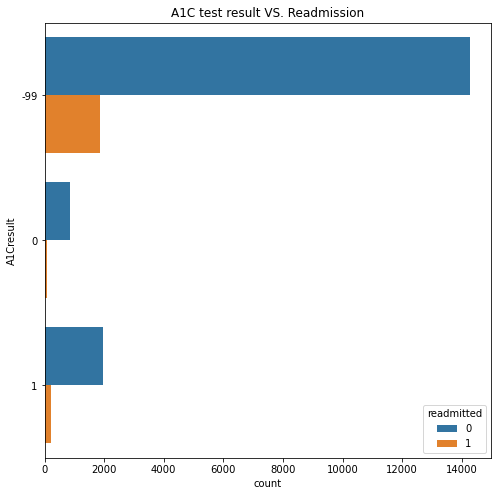

In [61]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')

In [62]:
##Number of lab procedure and Readmission

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

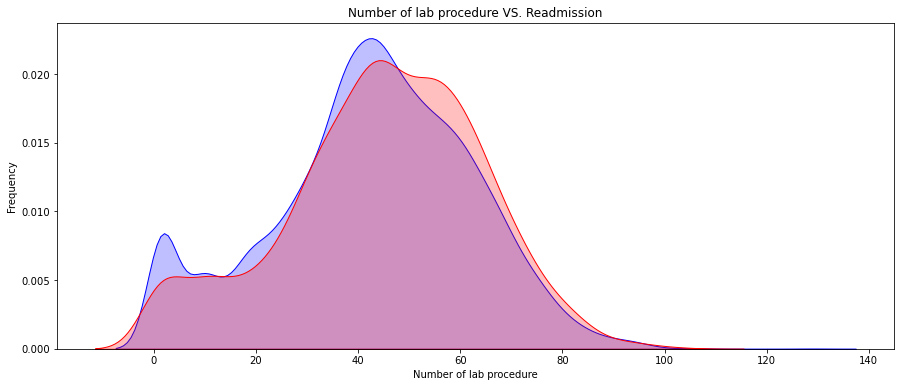

In [63]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

# Pre-Modeling Data Preprocessing

In [64]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     4987
7     4365
6     3244
9     3192
5     1854
4      718
10     521
3      296
2       95
1       13
Name: age, dtype: int64
75    4987
65    4365
55    3244
85    3192
45    1854
35     718
95     521
25     296
15      95
5       13
Name: age, dtype: int64


In [65]:
# convert data type of nominal features in dataframe to 'object' type

i=['admission_source_id','encounter_id','patient_nbr','gender','discharge_disposition_id','admission_type_id','age','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','max_glu_serum','level1_diag1','level1_diag2','level1_diag3','level2_diag1','level2_diag2','level2_diag3']
df[i] = df[i].astype(object)

In [66]:
df['encounter_id']=df['encounter_id'].astype(object)

In [67]:
df['patient_nbr']=df['patient_nbr'].astype(object)

In [68]:
df['gender']=df['gender'].astype(object)

In [69]:
df['admission_type_id']=df['admission_type_id'].astype(object)

In [70]:
df['discharge_disposition_id']=df['discharge_disposition_id'].astype(object)

In [71]:
df['admission_source_id']=df['admission_source_id'].astype(object)

In [72]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [73]:
#Number of medication used: 
#Another possibly related factor could be the total number of medications used by the patient
#(which may indicate severity of their condition and/or the intensity of care). 
#So we created another feature by counting the medications used during the encounter
#(keys variable in code below is continued from above):

In [74]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    8891
0    4412
2    4248
3    1483
4     236
5      13
6       2
Name: nummed, dtype: int64

In [75]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['number_inpatient',
 'num_lab_procedures',
 'num_medications',
 'time_in_hospital',
 'num_procedures',
 'number_diagnoses',
 'service_utilization',
 'numchange',
 'number_emergency',
 'number_outpatient']

In [76]:
! pip install -U imbalanced-learn

In [77]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [78]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_inpatient,3.584132,20.789885,1.261403,Yes,log1p,1.409196,1.280265,0.512017
1,num_lab_procedures,-0.236883,-0.266484,19.787432,No,NA,-0.236883,-0.266484,19.787432
2,num_medications,1.388447,3.795617,8.195629,No,NA,1.388447,3.795617,8.195629
3,time_in_hospital,1.135195,0.861420,2.984224,No,NA,1.135195,0.861420,2.984224
4,num_procedures,1.296773,0.809661,1.705324,No,NA,1.296773,0.809661,1.705324
5,number_diagnoses,-0.794941,-0.373569,1.831852,No,NA,-0.794941,-0.373569,1.831852
6,service_utilization,4.887264,54.038144,2.249028,Yes,log1p,1.073526,0.443986,0.660623
7,numchange,1.396041,1.227905,0.483527,No,NA,1.396041,1.227905,0.483527
8,number_emergency,18.712247,790.327280,0.898676,Yes,log1p,3.545351,15.185406,0.317518
9,number_outpatient,8.152296,134.845027,1.214127,Yes,log1p,2.660691,7.176531,0.429967


In [79]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [80]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [81]:
df.shape

(19285, 54)

In [82]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['num_lab_procedures',
 'num_medications',
 'time_in_hospital',
 'number_inpatient_log1p',
 'number_emergency_log1p',
 'number_outpatient_log1p',
 'number_diagnoses',
 'num_procedures',
 'numchange',
 'service_utilization_log1p']

In [83]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [84]:
dfcopy = df.copy(deep = True)

In [85]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [86]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [87]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [88]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [89]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,12,3,36
1,21,3,63
2,15,3,45
3,11,10,110
4,10,2,20


In [90]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [91]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(17324, 55)

In [92]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [93]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

In [94]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,number_inpatient_log1p,service_utilization_log1p,number_emergency_log1p,number_outpatient_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
time_in_hospital,1.000000,0.314683,0.144927,0.435379,0.205223,0.071567,-0.023903,0.052552,0.000827,-0.010036,0.010013,nan,0.006571,0.016386,0.007470,-0.016025,-0.000636,-0.000537,0.008995,0.010616,0.001423,0.096312,-0.006449,-0.013000,nan,nan,0.005171,0.093279,0.053015,0.062318,0.135026,0.099223,0.056789,-0.003312,-0.030538,0.860498,0.264061,0.850297,0.490892,0.443844,0.227793,0.941112,0.227270
num_lab_procedures,0.314683,1.000000,0.018386,0.245699,0.133825,0.261011,-0.068867,0.021466,-0.018075,-0.001633,-0.003748,nan,-0.001471,-0.004123,-0.003424,-0.021675,-0.012540,-0.003724,-0.007468,0.010189,-0.008009,0.097280,-0.021244,-0.006449,nan,nan,-0.007815,0.058071,0.032357,0.035556,0.112076,0.053237,0.012330,0.018035,-0.056012,0.332221,0.116868,0.674276,0.743822,0.266010,0.131186,0.317901,0.157853
num_procedures,0.144927,0.018386,1.000000,0.323131,0.043812,-0.016235,-0.063253,0.006406,-0.011849,-0.000849,-0.000637,nan,-0.003817,-0.000100,0.003913,0.019644,0.001295,-0.003589,-0.003580,-0.010989,0.007212,0.008199,-0.007909,-0.008972,nan,nan,-0.001601,-0.014554,-0.027738,0.007454,-0.014343,-0.059946,-0.068780,-0.032385,-0.030295,0.258082,0.883608,0.138947,0.235183,0.278006,0.105618,0.152184,0.070309
num_medications,0.435379,0.245699,0.323131,1.000000,0.246773,0.020418,0.055253,0.037027,0.027111,-0.003889,0.043110,nan,0.043736,0.032219,0.008132,0.066863,0.053549,0.018883,0.005585,0.007689,-0.002364,0.204463,-0.009295,-0.001380,nan,nan,0.005186,0.233640,0.189417,0.049185,0.205593,0.076854,0.082222,0.016405,0.044805,0.750273,0.582999,0.441709,0.772855,0.904072,0.531842,0.458848,0.404290
number_diagnoses,0.205223,0.133825,0.043812,0.246773,1.000000,0.009745,-0.071911,0.042678,0.011638,-0.018702,0.022229,nan,-0.015009,-0.011977,0.000839,0.005192,-0.007338,-0.013853,-0.003890,0.009453,-0.000340,0.104349,-0.002557,-0.008567,nan,nan,-0.014694,0.055193,0.036101,0.042967,0.069796,0.113401,0.137964,0.067679,0.076108,0.233872,0.098243,0.202591,0.242674,0.592329,0.136632,0.463854,0.126708
A1Cresult,0.071567,0.261011,-0.016235,0.020418,0.009745,1.000000,0.031374,0.029729,0.000332,-0.004232,0.016109,nan,0.006941,-0.000989,0.003688,-0.011172,0.008112,-0.012720,0.001710,-0.006154,-0.010052,0.099942,-0.003994,0.010241,nan,nan,-0.003553,0.081858,0.073190,-0.009913,0.088942,-0.065150,-0.072040,-0.010103,-0.040724,0.061131,0.011358,0.171169,0.169937,0.031255,0.073819,0.063195,0.083842
metformin,-0.023903,-0.068867,-0.063253,0.055253,-0.071911,0.031374,1.000000,-0.009913,0.022250,-0.006738,0.029592,nan,0.080359,0.126647,-0.007974,0.046058,0.079990,0.018229,0.008977,-0.006905,-0.004205,-0.045935,-0.033547,-0.005638,nan,nan,0.016015,0.320723,0.280843,-0.013914,-0.005831,-0.066450,-0.041301,-0.024483,0.018803,-0.003668,-0.024428,-0.053334,-0.019707,0.009891,0.263117,-0.044958,-0.002275
repaglinide,0.052552,0.021466,0.006406,0.037027,0.042678,0.029729,-0.009913,1.000000,-0.002309,-0.003907,0.009400,nan,-0.016103,-0.020582,-0.001894,0.010814,0.016979,0.025998,-0.002118,-0.001640,-0.002679,0.023194,-0.003795,-0.001339,nan,nan,-0.000947,0.087741,0.066717,0.026356,0.054626,0.034377,0.035133,0.020527,0.013160,0.051675,0.012564,0.046113,0.036871,0.050135,0.085871,0.065742,0.056842
nateglinide,0.000827,

In [95]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)      
df_pd.drop(['race'], inplace=True, axis=1)

In [96]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [97]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['time_in_hospital',
 'num_medications|num_procedures',
 'num_medications|number_diagnoses',
 'glyburide',
 'A1Cresult',
 'patient_nbr',
 'pioglitazone',
 'num_medications|num_lab_procedures',
 'chlorpropamide',
 'number_diagnoses|time_in_hospital',
 'acetohexamide',
 'nateglinide',
 'troglitazone',
 'glipizide',
 'num_medications|time_in_hospital',
 'insulin',
 'num_medications|numchange',
 'num_procedures',
 'numchange',
 'metformin-rosiglitazone',
 'num_lab_procedures',
 'diabetesMed',
 'tolazamide',
 'number_inpatient_log1p',
 'number_emergency_log1p',
 'number_outpatient_log1p',
 'number_diagnoses',
 'time_in_hospital|num_lab_procedures',
 'service_utilization_log1p',
 'metformin',
 'tolbutamide',
 'glimepiride-pioglitazone',
 'miglitol',
 'glimepiride',
 'glyburide-metformin',
 'num_medications',
 'metformin-pioglitazone',
 'acarbose',
 'glipizide-metformin',
 'change|num_medications',
 'encounter_id',
 'repaglinide',
 'rosiglitazone']

In [98]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [99]:
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [100]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [101]:
df_pd.head().T

,0,1,3,4,5
encounter_id,245224068,280344456,127615968,74057760,390765206
patient_nbr,106074990,40608414,94194585,195372,30976182
age,85,85,75,75,75
time_in_hospital,-0.464265,-0.464265,1.883253,-0.799625,0.206454
num_lab_procedures,-0.040741,-1.049029,-2.057316,-0.14157,0.967546
...,...,...,...,...,...
AfricanAmerican,0,0,0,1,0
Asian,0,0,0,0,0
Caucasian,1,1,1,0,1
Hispanic,0,0,0,0,0


# Modeling

In [102]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange',]

In [103]:
X = df_pd[feature_set]
y = df_pd['readmitted']

# Logistic Regression

In [104]:
df_pd['readmitted'].value_counts()

0    14218
1     1446
Name: readmitted, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)

LogisticRegression()

In [106]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,464,464
1,57,57
All,521,521


#### Using Anova test to check both train and test data represents the overall data


* Null hypothesis: Train and test data represents the overall data
* Alternate hypothesis: Train and test data doesn't represents the overall data

In [107]:
from scipy.stats import f_oneway

f_oneway(y,y_train,y_test)

F_onewayResult(statistic=0.0014540620883596984, pvalue=0.998546994614946)

* Since, P value > 0.05, we accept null hypothesis
* Hence, train and test data represents the overall data

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.91
Precision is 0.00
Recall is 0.00


In [109]:
##Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it

In [110]:
!pip install imblearn

In [111]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 11375, 1: 1156})
New dataset shape Counter({0: 11375, 1: 11375})


In [112]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)

LogisticRegression()

In [113]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,411,425,836
1,31,40,71
All,442,465,907


In [114]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.64
Precision is 0.64
Recall is 0.64


Fitting a base model

In [115]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

In [117]:
base_mod = LogisticRegression()
base_mod.fit(x_train_sc,y_train)

ytest_pred = base_mod.predict(x_test_sc)

In [118]:
print('Confusion Matrix:')
confusion_matrix(y_test,ytest_pred)

Confusion Matrix:


array([[1968,  308],
       [ 402, 1872]], dtype=int64)

In [119]:
print('Classification report:')
print(classification_report(y_test,ytest_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2276
           1       0.86      0.82      0.84      2274

    accuracy                           0.84      4550
   macro avg       0.84      0.84      0.84      4550
weighted avg       0.84      0.84      0.84      4550



In [120]:
print('Overall accuracy:',accuracy_score(y_test,ytest_pred))

Overall accuracy: 0.843956043956044


In [121]:
print('Precision score:',precision_score(y_test,ytest_pred))
print('Recall score   :',recall_score(y_test,ytest_pred))
print('F1 score       :',f1_score(y_test,ytest_pred))

Precision score: 0.8587155963302753
Recall score   : 0.8232189973614775
F1 score       : 0.8405927256398743


In [122]:
print('Cohen’s Kappa Value:',cohen_kappa_score(y_test,ytest_pred))

Cohen’s Kappa Value: 0.6879063593487045


### Treating imbalance data

ROC AUC Score: 0.8439469327756421


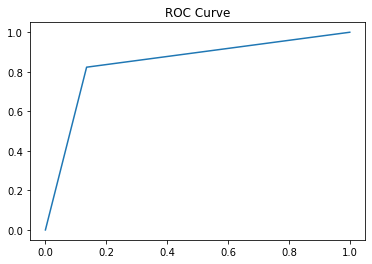

In [123]:
yprob = base_mod.predict_proba(x_test_sc)[:,1]

print('ROC AUC Score:',roc_auc_score(y_test,ytest_pred))
fpr,tpr,th = roc_curve(y_test,ytest_pred)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()

In [124]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [125]:
y.value_counts()

0    14218
1     1446
Name: readmitted, dtype: int64

In [126]:
len(y)

15664

In [127]:
count_class_0 = 10381
count_class_1 = 8777

pipe = make_pipeline(SMOTE(sampling_strategy={1:count_class_1}),NearMiss(sampling_strategy={0:count_class_0}))
inp, out = pipe.fit_resample(X,y)

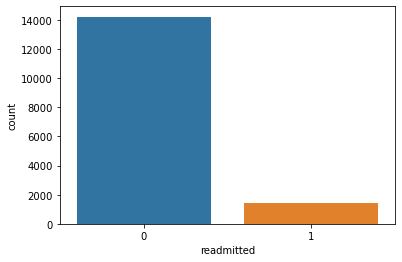

In [128]:
sns.countplot(y)
plt.show()

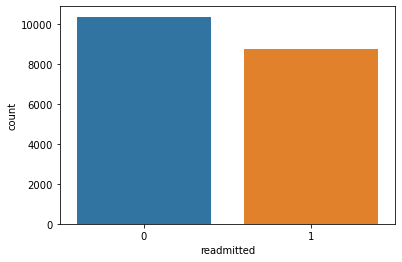

In [129]:
sns.countplot(out)
plt.show()

### After treating imbalance data


In [130]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(inp,out,test_size=0.3,random_state=10)

In [131]:
sc = StandardScaler()
xtrain_sc1 = sc.fit_transform(xtrain1)
xtest_sc1 = sc.transform(xtest1)

In [132]:
base_mod1 = LogisticRegression()
base_mod1.fit(xtrain_sc1,ytrain1)

ytest_pred1 = base_mod1.predict(xtest_sc1)

In [133]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ytest_pred1)

Confusion Matrix:


array([[2769,  351],
       [ 578, 2050]], dtype=int64)

In [134]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ytest_pred1)

Confusion Matrix:


array([[2769,  351],
       [ 578, 2050]], dtype=int64)

### Re-fitting the model

#### Comparing with other classification models:

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from xgboost import XGBClassifier

In [136]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [137]:
clf1 = LogisticRegression(max_iter=3000)
clf2 = RandomForestClassifier(random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = GaussianNB()
clf5 = XGBClassifier(random_state=0)

In [138]:
print('Accuracy scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc1,ytrain1,cv=kf,scoring='accuracy')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

Accuracy scores of the models
LR: 0.84 0.0
RF: 0.92 0.0
KNN: 0.85 0.0
GNB: 0.63 0.01
[18:23:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from

In [139]:
print('ROC AUC scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc1,ytrain1,cv=kf,scoring='roc_auc')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

ROC AUC scores of the models
LR: 0.9 0.01
RF: 0.96 0.0
KNN: 0.91 0.01
GNB: 0.83 0.01
[18:24:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from

In [140]:
### Final model:

# By comparing the accuracy, XGBoost Classifier model is the best model


# ROC AUC is also better for XGBoost Classifier model where it results how well the model is able to predict the classes correctly

In [141]:
best_mod = XGBClassifier(random_state=0)
best_mod.fit(xtrain_sc1,ytrain1)
ypred = best_mod.predict(xtest_sc1)

[18:24:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [142]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ypred)

Confusion Matrix:


array([[3042,   78],
       [ 388, 2240]], dtype=int64)

In [143]:
print('Classification report:')
print(classification_report(ytest1,ypred))

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3120
           1       0.97      0.85      0.91      2628

    accuracy                           0.92      5748
   macro avg       0.93      0.91      0.92      5748
weighted avg       0.92      0.92      0.92      5748



In [144]:
print('Overall accuracy:',round(accuracy_score(ytest1,ypred),2))
print('Precision score :',round(precision_score(ytest1,ypred),2))
print('Recall score    :',round(recall_score(ytest1,ypred),2))
print('F1 score        :',round(f1_score(ytest1,ypred),2))

Overall accuracy: 0.92
Precision score : 0.97
Recall score    : 0.85
F1 score        : 0.91


ROC AUC Score: 0.9449248477929985


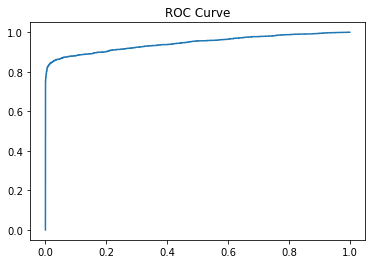

In [145]:
yprob1 = best_mod.predict_proba(xtest_sc1)[:,1]

print('ROC AUC Score:',roc_auc_score(ytest1,yprob1))
fpr,tpr,th = roc_curve(ytest1,yprob1)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()

In [146]:
best_mod

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Tuning hyperparameters:

In [147]:
param = {'n_estimators':[100, 120, 150],
         'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015],
         'gamma':[2, 3, 4, 5, 6],
         'max_depth':[2, 3, 4, 5, 6],
         'objective': ["binary:logistic"],
         'eval_metric' :["logloss"]}

In [148]:
xgb = XGBClassifier()
hyp_tune = GridSearchCV(xgb,param_grid=param,cv=kf,scoring='accuracy')
best_param = hyp_tune.fit(xtrain_sc1,ytrain1)

In [149]:
best_param.best_params_

{'eval_metric': 'logloss',
 'gamma': 2,
 'learning_rate': 0.15,
 'max_depth': 6,
 'n_estimators': 120,
 'objective': 'binary:logistic'}

In [150]:
final_params = best_param.best_params_
final_params

{'eval_metric': 'logloss',
 'gamma': 2,
 'learning_rate': 0.15,
 'max_depth': 6,
 'n_estimators': 120,
 'objective': 'binary:logistic'}

In [151]:
final_mod = XGBClassifier(**final_params)
final_mod.fit(xtrain_sc1,ytrain1)
ypred1 = final_mod.predict(xtest_sc1)

In [152]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ypred1)

Confusion Matrix:


array([[3059,   61],
       [ 411, 2217]], dtype=int64)

In [153]:
print('Classification report:')
print(classification_report(ytest1,ypred1))

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3120
           1       0.97      0.84      0.90      2628

    accuracy                           0.92      5748
   macro avg       0.93      0.91      0.92      5748
weighted avg       0.92      0.92      0.92      5748



In [154]:
print('Overall accuracy:',round(accuracy_score(ytest1,ypred1),2))
print('Precision score :',round(precision_score(ytest1,ypred1),2))
print('Recall score    :',round(recall_score(ytest1,ypred1),2))
print('F1 score        :',round(f1_score(ytest1,ypred1),2))

Overall accuracy: 0.92
Precision score : 0.97
Recall score    : 0.84
F1 score        : 0.9


ROC AUC Score: 0.9485922071966592


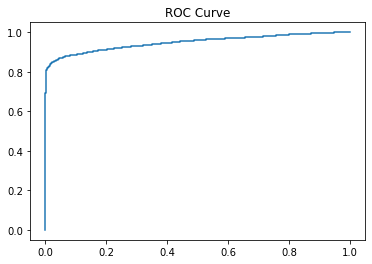

In [155]:
yprob2 = final_mod.predict_proba(xtest_sc1)[:,1]

print('ROC AUC Score:',roc_auc_score(ytest1,yprob2))
fpr,tpr,th = roc_curve(ytest1,yprob2)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()

In [156]:
final_mod.feature_importances_

array([0.01594431, 0.03739401, 0.03421003, 0.01201092, 0.01351589,
       0.01346685, 0.16939043, 0.01173355, 0.03036914, 0.0047241 ,
       0.00308682, 0.        , 0.01305095, 0.01720877, 0.0183863 ,
       0.03713821, 0.02785317, 0.        , 0.        , 0.03254501,
       0.0030845 , 0.02508543, 0.02814991, 0.05425677, 0.05800636,
       0.03449493, 0.02847622, 0.02772221, 0.0489416 , 0.00468927,
       0.00179827, 0.00225473, 0.00438975, 0.04298067, 0.02087116,
       0.01013748, 0.00303782, 0.00301068, 0.01061434, 0.01671606,
       0.01171514, 0.00789885, 0.00644268, 0.00676693, 0.00530181,
       0.00471468, 0.02308388, 0.00508447, 0.00824499], dtype=float32)

### Feature selection

In [158]:
xgb_features = pd.DataFrame({'Features':X_train.columns,'Feature_importance':final_mod.feature_importances_})
xgb_features.sort_values('Feature_importance',ascending=False)

,Features,Feature_importance
6,number_inpatient_log1p,0.169390
24,Hispanic,0.058006
23,Caucasian,0.054257
28,admission_type_id_5,0.048942
33,admission_source_id_4,0.042981
1,time_in_hospital,0.037394
15,pioglitazone,0.037138
25,Other,0.034495
2,num_procedures,0.034210
19,insulin,0.032545


In [159]:
best_feat = list(xgb_features[xgb_features['Feature_importance']>0.04]['Features'])
best_feat

['number_inpatient_log1p',
 'Caucasian',
 'Hispanic',
 'admission_type_id_5',
 'admission_source_id_4']

In [160]:
xtrain_sc11 = pd.DataFrame(xtrain_sc1,columns=xtrain1.columns)
xtrain_sc11[best_feat].head()

,number_inpatient_log1p,Caucasian,Hispanic,admission_type_id_5,admission_source_id_4
0,2.567791,0.656747,-0.110581,-0.269974,-0.186767
1,0.921298,-1.522657,-0.110581,-0.269974,-0.186767
2,0.921298,0.656747,-0.110581,-0.269974,5.354264
3,0.921298,0.656747,-0.110581,-0.269974,-0.186767
4,-0.725195,-1.522657,-0.110581,-0.269974,-0.186767


In [161]:
xtest_sc11 = pd.DataFrame(xtest_sc1,columns=xtest1.columns)
xtest_sc11[best_feat].head()

,number_inpatient_log1p,Caucasian,Hispanic,admission_type_id_5,admission_source_id_4
0,-0.725195,0.656747,-0.110581,-0.269974,-0.186767
1,-0.725195,0.656747,-0.110581,-0.269974,-0.186767
2,0.397219,0.656747,-0.110581,-0.269974,-0.186767
3,-0.725195,0.656747,-0.110581,-0.269974,-0.186767
4,-0.725195,0.656747,-0.110581,-0.269974,-0.186767


In [162]:
final_mod1 = XGBClassifier(**final_params)
final_mod1.fit(xtrain_sc11[best_feat],ytrain1)
ypred11 = final_mod1.predict(xtest_sc11[best_feat])

In [163]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ypred11)

Confusion Matrix:


array([[3120,    0],
       [1318, 1310]], dtype=int64)

In [164]:
print('Classification report:')
print(classification_report(ytest1,ypred11))

Classification report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      3120
           1       1.00      0.50      0.67      2628

    accuracy                           0.77      5748
   macro avg       0.85      0.75      0.75      5748
weighted avg       0.84      0.77      0.75      5748



In [165]:
print('Overall accuracy:',round(accuracy_score(ytest1,ypred11),2))
print('Precision score :',round(precision_score(ytest1,ypred11),2))
print('Recall score    :',round(recall_score(ytest1,ypred11),2))
print('F1 score        :',round(f1_score(ytest1,ypred11),2))

Overall accuracy: 0.77
Precision score : 1.0
Recall score    : 0.5
F1 score        : 0.67


ROC AUC Score: 0.8015842090114351


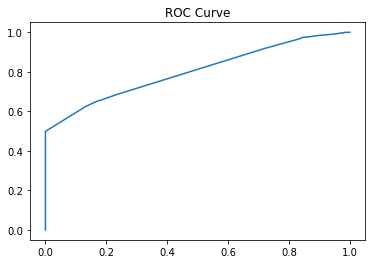

In [166]:
yprob11 = final_mod1.predict_proba(xtest_sc11[best_feat])[:,1]

print('ROC AUC Score:',roc_auc_score(ytest1,yprob11))
fpr,tpr,th = roc_curve(ytest1,yprob11)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()

# Decision Tree

In [167]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 
                 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [168]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']
df_pd['readmitted'].value_counts()

0    14218
1     1446
Name: readmitted, dtype: int64

In [169]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 14218, 1: 1446})
New dataset shape Counter({0: 14218, 1: 14218})


In [170]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [171]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,507,470,977
1,66,57,123
All,573,527,1100


In [172]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.89
Precision is 0.89
Recall is 0.88


                    Feature  Importance
26                 gender_1    0.011243
4   number_outpatient_log1p    0.011848
40         level1_diag1_1.0    0.013062
41         level1_diag1_2.0    0.013254
0                       age    0.038286
2            num_procedures    0.059471
3           num_medications    0.065141
7          number_diagnoses    0.075571
6    number_inpatient_log1p    0.117333
1          time_in_hospital    0.455596


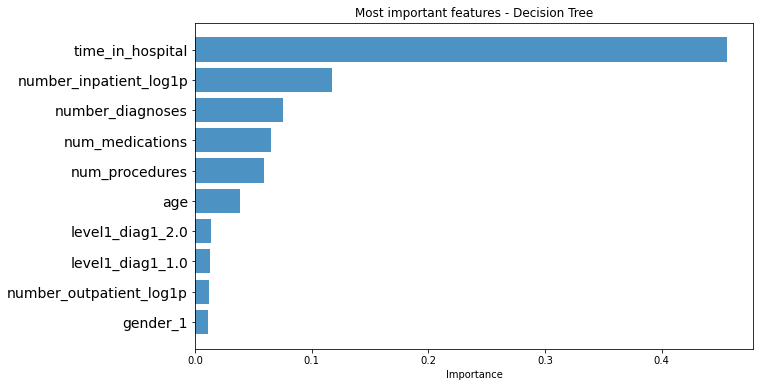

In [173]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

In [ ]:
### in reference with the above chart we can infer that few parameterd like (time_in_hospital,num_medications,
#num_procedures,number_inpatient_log1p)  are most important predictor variable that play a vital role while predicting the 
#the target variable.

# Random Forest

In [174]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 14218, 1: 1446})
New dataset shape Counter({0: 14218, 1: 14218})


In [175]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [176]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [177]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,522,455,977
1,66,57,123
All,588,512,1100


In [178]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.90
Precision is 0.92
Recall is 0.88


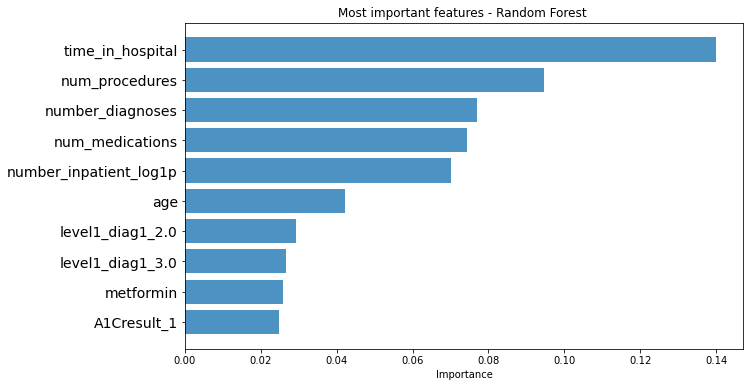

In [179]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

In [ ]:
### in reference with the above chart we can infer that few parameterd like (time_in_hospital,num_medications,
#num_procedures,number_inpatient_log1p)  are most important predictor variable that play a vital role while predicting the 
#the target variable.

# Model Comparision

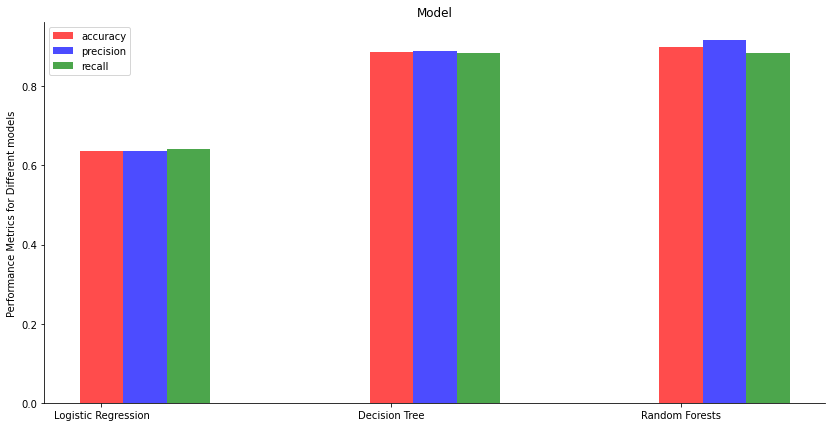

In [180]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [accuracy_logit, accuracy_dtree, accuracy_rm]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [precision_logit, precision_dtree, precision_rm]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [recall_logit, recall_dtree, recall_rm, ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()